In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'/Users/bryanleavelle/Bootcamp/Immersion/Ch 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Exo2.6.csv'))

# TABLE OF CONTENTS <br>
## 1. SUPERVISED MACHINE LEARNING: ORBIT PERIOD VS STAR RADIUS
## 2. SUPERVISED MACHINE LEARNING: PLANET RADIUS VS PLANET MASS
## 3. SUPERVISED MACHINE LEARNING: PLANET TEMP VS STAR MASS

# FIRST, LETS JUST GET A LIST OF VARIABLES AND NULLS

### ok, so there are over 5k planets in this data set, but there is a lot of missing information. First I am going to find a suitable variables that are missing the least amount of values before I go trying to use machine learning to predict stuff from it.

In [5]:
df.isnull().sum()

planet_name              0
star_name                0
#stars                   0
#planets                 0
discoverymethod          0
disc_year                0
disc_facility            0
latitude                 0
longitude                0
Country                  0
us_state                 0
controversy_flag         0
orbit_period           174
orbit_axis            2211
planet_radius         1152
planet_mass           2940
orbit_eccentricity    3255
insolation_flux       4650
planet_temp           4095
star_spectype         4062
star_teff              365
star_radius            458
star_mass              759
star_metals           1400
metal_ratios          1412
st_logg                624
dec                      0
system_distance        115
vmag                   147
kmag                   148
gaia_mag               192
rowupdate                1
publish_date             0
releasedate              0
dtype: int64

### There are a couple of good options. 

# 1. ORBIT PERIOD VS STAR RADIUS

## 1.1 INITIAL DATA PLOT

In [6]:
dups = df.duplicated()

In [7]:
dups.shape

(5060,)

In [8]:
df['orbit_period'].mean()

86105.9811215876

In [9]:
df['orbit_period'].median()

11.538575

In [10]:
df['orbit_period'].max()

402000000.0

### bonkers.

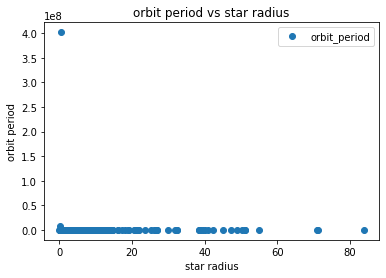

In [11]:
df.plot(x = 'star_radius', y='orbit_period',style='o') 
plt.title('orbit period vs star radius')  
plt.xlabel('star radius')  
plt.ylabel('orbit period')  
plt.show()

### Hard to see anything interesting with these outliers. Lets lower the threshold a little bit to exclude them.

In [12]:
# find SD of orbit period

df['orbit_period']. std()

5753179.118798121

In [13]:
# mult SD by 2.5 to find outlier threshold

5753179.118798121 * 2.5

14382947.796995303

In [14]:
df_test = df[df['orbit_period'] <=14382947] 

In [15]:
df_test.shape

(4885, 34)

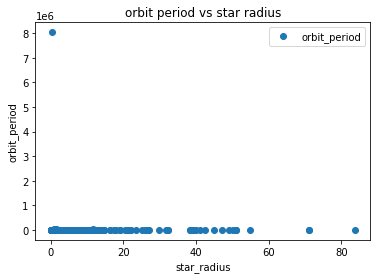

In [16]:
df_test.plot(x = 'star_radius', y='orbit_period',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('orbit period vs star radius')  
plt.xlabel('star_radius')  
plt.ylabel('orbit_period')  
plt.show()

# STILL hard to see anything intersting. Maybe we can lower the threshold further.

In [17]:
# how many planets are there above SD*2.5?

df_test = df[df['orbit_period'] >=14382947] 

In [18]:
df_test.shape

(1, 34)

### one out of almost 5k. What about if we remove another digit from that threshold?

In [19]:
df_test = df[df['orbit_period'] >=1438294] 
df_test.shape

(4, 34)

### I think I am OK losing 4 planets out of 5k to maybe have more interesting results. Lets make a new DF containing only data we want and clean it a little bit further.

In [20]:
# new DF

df_test = df[['orbit_period', 'star_radius']]

In [21]:
# exclude outliers

df_test = df_test[df_test['orbit_period'] <=1438294] 

In [22]:
df_test.shape

(4882, 2)

In [23]:
df_test.head()

,orbit_period,star_radius
0,326.03000,19.00
1,516.21997,29.79
2,185.84000,11.00
3,1773.40002,0.93
4,798.50000,1.13


In [24]:
# check for nulls

df_test.isnull().sum()

orbit_period      0
star_radius     295
dtype: int64

In [25]:
# remove nulls

df_test = df_test.dropna()

In [26]:
df_test.isnull().sum()

orbit_period    0
star_radius     0
dtype: int64

In [27]:
df_test.shape

(4587, 2)

In [28]:
df_test.max()

orbit_period    39000.0
star_radius        83.8
dtype: float64

### nice

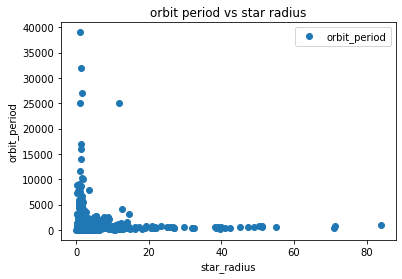

In [29]:
df_test.plot(x = 'star_radius', y='orbit_period',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('orbit period vs star radius')  
plt.xlabel('star_radius')  
plt.ylabel('orbit_period')  
plt.show()

/Users/bryanleavelle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='star_radius', ylabel='Density'>

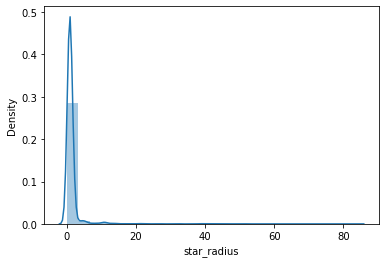

In [30]:
sns.distplot(df_test['star_radius'], bins=25)

/Users/bryanleavelle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='orbit_period', ylabel='Density'>

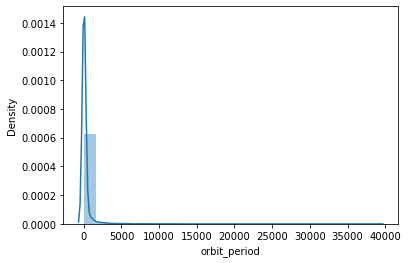

In [31]:
sns.distplot(df_test['orbit_period'], bins=25)

### yay! Still doesnt look very predictable, but at least we can see some more detail of the shape of the data. Moving on!

## 1.2 HYPOTHESIS
### I HYPOTHESIZE THIS MODEL WILL NOT BE VERY PREDICTIVE AT ALL: no relationship between star radius and planet obrit lengths

## 1.3 RESHAPE DATA AND SPLIT INTO TRAINING SETS

In [32]:
#Reshape data

X = df_test['star_radius'].values.reshape(-1,1)
y = df_test['orbit_period'].values.reshape(-1,1)

In [33]:
X

array([[19.  ],
       [29.79],
       [11.  ],
       ...,
       [ 1.56],
       [11.22],
       [12.  ]])

In [34]:
y

array([[ 326.03   ],
       [ 516.21997],
       [ 185.84   ],
       ...,
       [1276.46   ],
       [ 385.2    ],
       [ 136.75   ]])

In [35]:
#split into training set reserving 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 1.4 REGRESSION

In [36]:
regression = LinearRegression()

In [37]:
#fit regression onto training set

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# predict orbit perid using star radius

y_predicted = regression.predict(X_test)

## 1.5 TEST PLOT

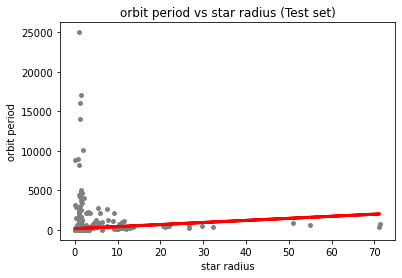

In [39]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('orbit period vs star radius (Test set)')
plot_test.xlabel('star radius')
plot_test.ylabel('orbit period')
plot_test.show()

### hey whaddaya know, i spy a slight slope. Maybe orbit period does increase with star radius? Probably not, i predict a tiny R2 and large MSE

## 1.6 TEST THE MODEL 

In [40]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[26.16880327]]
Mean squared error:  1453967.2081743588
R2 score:  0.0007941989876215638


### woooow, this thing cannot be trusted!!! R2 = predicts .08% of the variation. MSE = So so so big. Ha.

In [42]:
# prediction vs actual table. This is very funny.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.887530,180.363534
1,417.900000,704.786352
2,1.212880,180.363534
3,7.748500,173.036269
4,76.422302,186.382359
5,3.167892,180.363534
6,2.440830,173.559645
7,22.708168,188.737551
8,8.704194,177.484966
9,9.705716,183.765478


### graph of training set results

In [43]:
y_predicted_train = regression.predict(X_train)

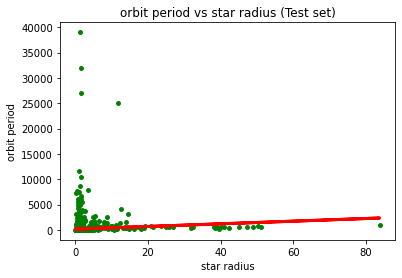

In [44]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('orbit period vs star radius (Test set)')
plot_test.xlabel('star radius')
plot_test.ylabel('orbit period')
plot_test.show()

## 1.7 FINAL THOUGHTS

Cannot predict orbit based on star radius.

# 2. PLANET RADIUS VS PLANET MASS

## 2.1 INITIAL PLOTS

In [45]:
# new df containing only data we are interested in.

df_ml2 = df[['planet_radius', 'planet_mass']]

In [46]:
# drop nulls from new df
df_ml2 = df_ml2.dropna()

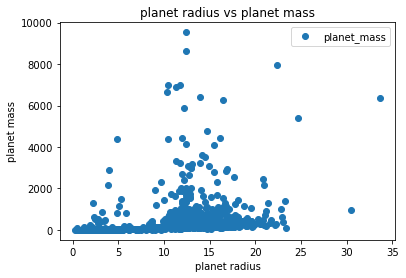

In [47]:
df_ml2.plot(x = 'planet_radius', y='planet_mass',style='o') 
plt.title('planet radius vs planet mass')  
plt.xlabel('planet radius')  
plt.ylabel('planet mass')  
plt.show()

/Users/bryanleavelle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='planet_mass', ylabel='Density'>

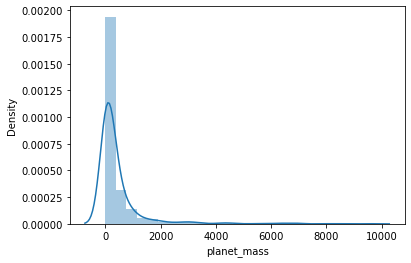

In [48]:
sns.distplot(df_ml2['planet_mass'], bins=25)

/Users/bryanleavelle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='planet_radius', ylabel='Density'>

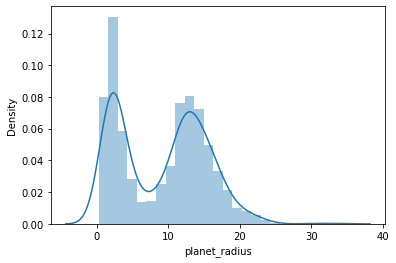

In [49]:
sns.distplot(df_ml2['planet_radius'], bins=25)

### I think I am OK with all of this. I would hate to over fit my data just to try and get accurate predictions from a machine that can't really think.

## 2.2 HYPOTHESIS
### I hypothesize that this will be slightly more predictive than the last one, but still mostly useless

## 2.3 RESHAPE DATA AND SPLIT INTO TRAINING SETS

In [50]:
X2 = df_ml2['planet_mass'].values.reshape(-1,1)
y2 = df_ml2['planet_radius'].values.reshape(-1,1)

In [51]:
X2

array([[4.41783700e+03],
       [6.65748000e+03],
       [7.99000000e+00],
       [2.22481000e+01],
       [4.76742610e+03],
       [2.47906157e+03],
       [2.00231896e+03],
       [5.40300000e+03],
       [3.27350000e+02],
       [8.74000000e+02],
       [7.40510000e+02],
       [2.91438000e+02],
       [4.15704000e+02],
       [2.41540000e+03],
       [1.70032000e+02],
       [7.72290000e+02],
       [1.10282000e+03],
       [3.52780000e+02],
       [1.10282000e+03],
       [7.18295800e+02],
       [1.22000000e+01],
       [8.89900000e+02],
       [5.70000000e+00],
       [2.80000000e+01],
       [8.58100000e+01],
       [1.65260000e+02],
       [3.30211000e+03],
       [1.53829720e+02],
       [2.70155500e+02],
       [6.88391000e+03],
       [9.21707000e+02],
       [2.66977200e+02],
       [2.28830000e+02],
       [1.48420000e+02],
       [9.40740000e+02],
       [4.07661000e+00],
       [6.99200000e+01],
       [2.66977200e+02],
       [4.76745000e+01],
       [9.53490000e+02],


In [52]:
y2

array([[16.141],
       [10.31 ],
       [ 1.875],
       [ 2.578],
       [14.684],
       [20.849],
       [12.442],
       [24.66 ],
       [16.7  ],
       [10.87 ],
       [16.03 ],
       [16.14 ],
       [ 9.92 ],
       [12.22 ],
       [13.11 ],
       [11.43 ],
       [14.68 ],
       [14.46 ],
       [16.432],
       [14.572],
       [ 4.88 ],
       [11.77 ],
       [ 3.7  ],
       [ 5.   ],
       [12.11 ],
       [14.12 ],
       [11.287],
       [10.705],
       [10.088],
       [11.32 ],
       [11.31 ],
       [16.365],
       [13.34 ],
       [15.558],
       [13.068],
       [ 1.681],
       [ 6.39 ],
       [11.949],
       [ 6.389],
       [11.781],
       [12.442],
       [ 1.95 ],
       [ 3.67 ],
       [ 3.94 ],
       [ 1.13 ],
       [ 2.742],
       [ 1.193],
       [ 2.61 ],
       [ 4.57 ],
       [ 1.264],
       [ 1.217],
       [ 0.718],
       [ 1.15 ],
       [ 2.63 ],
       [ 8.4  ],
       [ 4.17 ],
       [ 1.305],
       [ 1.577],
       [ 1.241

In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# 2.4 REGRESSION

In [54]:
regression2 = LinearRegression()

In [55]:
regression2.fit(X2_train, y2_train)

LinearRegression()

In [56]:
y2_predicted = regression2.predict(X2_test)

# 2.5 TEST PLOT

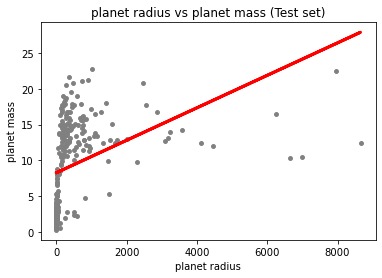

In [86]:
plot_ml2 = plt
plot_ml2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_ml2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_ml2.title('planet radius vs planet mass (Test set)')
plot_ml2.xlabel('planet radius')
plot_ml2.ylabel('planet mass')
plot_ml2.show()

### woah cool, looks much better than the last one!

# 2.6 TEST THE MODEL

In [58]:
rmse2 = mean_squared_error(y2_test, y2_predicted) 
r2_2 = r2_score(y2_test, y2_predicted)  

In [59]:
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[0.00226712]]
Mean squared error:  33.55900906078254
R2 score:  0.11256305699417068


### The numbers look better, too. While theres a decently high error MSE, both the MSE and R2 is much better than the last model.

In [61]:
# prediction vs actual 

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,2.149,8.305090
1,1.210,8.537968
2,10.705,8.614891
3,17.150,10.499872
4,14.796,8.640831
5,3.484,8.281330
6,2.050,8.278428
7,17.710,14.030609
8,1.190,8.316017
9,0.296,8.273346


### yeesh, well when you put it that way...

## 2.7 FINAL THOUGHTS

Might be able to ballpark mass from radius, but there are obviously many other factors that go into deciding the mass of a planet besides just how wide it is.

# 3. PLANET TEMP VS STAR MASS

### OK, this is not going very well, but we learned on a Tableau scatter that there might be a relationship between star mass and planet temp. Lets try that out for this final machine learning model.

## 3.1 INITIAL PLOTS

In [70]:
# new df containing only data we are interested in.

df_ml3 = df[['star_mass', 'planet_temp']]

In [71]:
df_ml3.shape

(5060, 2)

In [72]:
# drop nulls

df_ml3 = df_ml3.dropna()

In [73]:
df_ml3.shape

(957, 2)

### not very much data left, but we are at the edge of our knowledge about the world. lets keep going anyway.

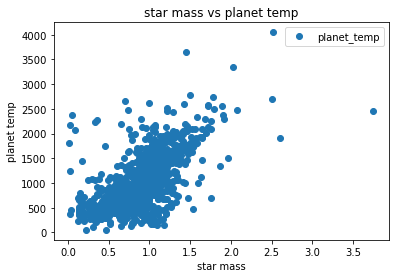

In [76]:
df_ml3.plot(x = 'star_mass', y='planet_temp',style='o') 
plt.title('star mass vs planet temp')  
plt.xlabel('star mass')  
plt.ylabel('planet temp')  
plt.show()

/Users/bryanleavelle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='star_mass', ylabel='Density'>

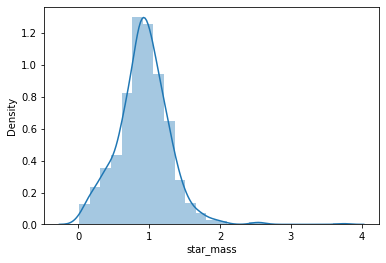

In [77]:
sns.distplot(df_ml3['star_mass'], bins=25)

/Users/bryanleavelle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='planet_temp', ylabel='Density'>

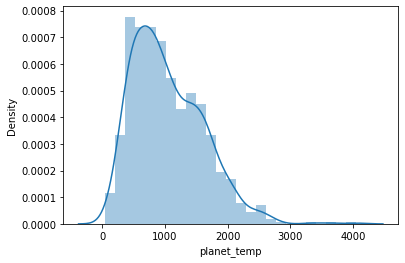

In [78]:
sns.distplot(df_ml3['planet_temp'], bins=25)

### looks pretty good... cant throw anything else away now, anyways!

## 3.2 HYPOTHESIS
### star mass might actually be a decent predictor for planet temp

## 3.3 RESHAPE DATA AND SPLIT INTO TRAINING SETS

In [80]:
# reshape data

X3 = df_ml3['star_mass'].values.reshape(-1,1)
y3 = df_ml3['planet_temp'].values.reshape(-1,1)

In [82]:
X3

array([[0.85],
       [0.17],
       [0.02],
       [0.08],
       [1.75],
       [1.  ],
       [0.16],
       [0.02],
       [0.01],
       [0.37],
       [0.95],
       [0.89],
       [1.27],
       [1.08],
       [1.09],
       [1.13],
       [1.04],
       [0.95],
       [1.21],
       [1.1 ],
       [1.14],
       [0.91],
       [0.91],
       [1.09],
       [1.09],
       [1.05],
       [1.16],
       [1.  ],
       [1.05],
       [0.96],
       [1.08],
       [1.21],
       [1.21],
       [1.21],
       [1.21],
       [1.44],
       [0.87],
       [1.01],
       [0.88],
       [0.62],
       [1.17],
       [0.83],
       [0.83],
       [0.99],
       [0.99],
       [0.69],
       [0.69],
       [1.32],
       [0.9 ],
       [1.05],
       [1.05],
       [1.05],
       [0.05],
       [0.3 ],
       [0.3 ],
       [0.29],
       [0.18],
       [0.18],
       [0.18],
       [0.38],
       [0.73],
       [0.36],
       [0.9 ],
       [0.64],
       [0.54],
       [0.36],
       [0.

In [83]:
y3

array([[1700.],
       [1450.],
       [1250.],
       [2075.],
       [ 700.],
       [1303.],
       [ 464.],
       [ 370.],
       [1800.],
       [ 434.],
       [1898.],
       [ 600.],
       [1657.],
       [1442.],
       [1700.],
       [1952.],
       [1626.],
       [1550.],
       [2000.],
       [ 885.],
       [1660.],
       [1070.],
       [ 850.],
       [1330.],
       [1600.],
       [1500.],
       [1074.],
       [1438.],
       [1017.],
       [ 420.],
       [ 938.],
       [ 877.],
       [1239.],
       [1632.],
       [1314.],
       [1000.],
       [ 854.],
       [ 850.],
       [ 961.],
       [ 431.],
       [ 817.],
       [1149.],
       [ 866.],
       [ 756.],
       [ 658.],
       [ 536.],
       [ 316.],
       [1401.],
       [ 183.],
       [1616.],
       [ 990.],
       [ 752.],
       [2375.],
       [ 587.],
       [ 387.],
       [ 456.],
       [ 529.],
       [ 300.],
       [ 596.],
       [1089.],
       [ 422.],
       [ 351.],
       [

In [84]:
# split into training sets, 30% for testing.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

## 3.4 REGRESSION

In [85]:
regression3 = LinearRegression()
regression3.fit(X3_train, y3_train)
y3_predicted = regression3.predict(X3_test)

## TEST PLOT

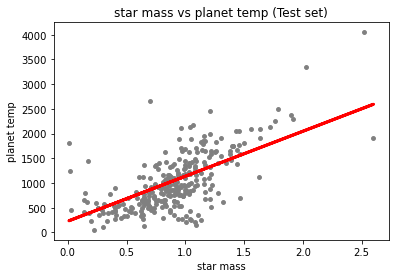

In [87]:
plot_ml3 = plt
plot_ml3.scatter(X3_test, y3_test, color='gray', s = 15)
plot_ml3.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_ml3.title('star mass vs planet temp (Test set)')
plot_ml3.xlabel('star mass')
plot_ml3.ylabel('planet temp')
plot_ml3.show()

### hmmmm, Im skeptical! Lets look at the numbers...

## 3.5 TEST THE MODEL

In [90]:
rmse3 = mean_squared_error(y3_test, y3_predicted) 
r2_3 = r2_score(y3_test, y3_predicted) 

In [91]:
print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[909.90294389]]
Mean squared error:  186751.34654714455
R2 score:  0.43530813119153655


### again we find ourselves in a tough spot when trying to predict anything about exoplanets based on available variables. Science is hard.

# FIN